In [22]:
# @title Mounting GDrive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# @title Import Required Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
# @title Import DataSet
path ="/content/drive/MyDrive/Grad Seminar FP CSV Files/LungCancer.csv"
df = pd.read_csv(path)
print(f"Total Number of Records = {df.shape[0]} and Features = {df.shape[1]}")

Total Number of Records = 309 and Features = 16


### Data Pre-Processing

####  Info()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Observations:**

    1. No Missing Records

#### describe()

In [26]:
df.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


**Observations:**

    1. Male are of about 52% out of total population
    2. Average Age is about 62 Years from the population
    3. 87% of population detected as Lung Cancer Positive

### Exploratory Data Analysis (EDA)

#### Univariate-Analysis

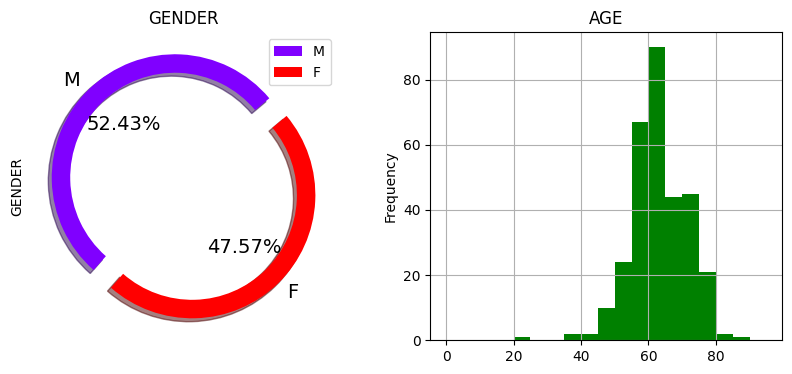

In [27]:
f,ax = plt.subplots(1,2,figsize=(10,4))
#- GENDER
df.GENDER.value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='rainbow', startangle=40, ax=ax[0], title='GENDER')
#- AGE
df.AGE.plot(kind='hist',bins=np.arange(0,100,5), color='green', ax=ax[1], title='AGE')
ax[1].grid(True)

plt.show()

**Observations:**

    1. 52% are of Male population and 48% of Female Population  
    2. Age is mostly distributed aroung 40 to 80 years

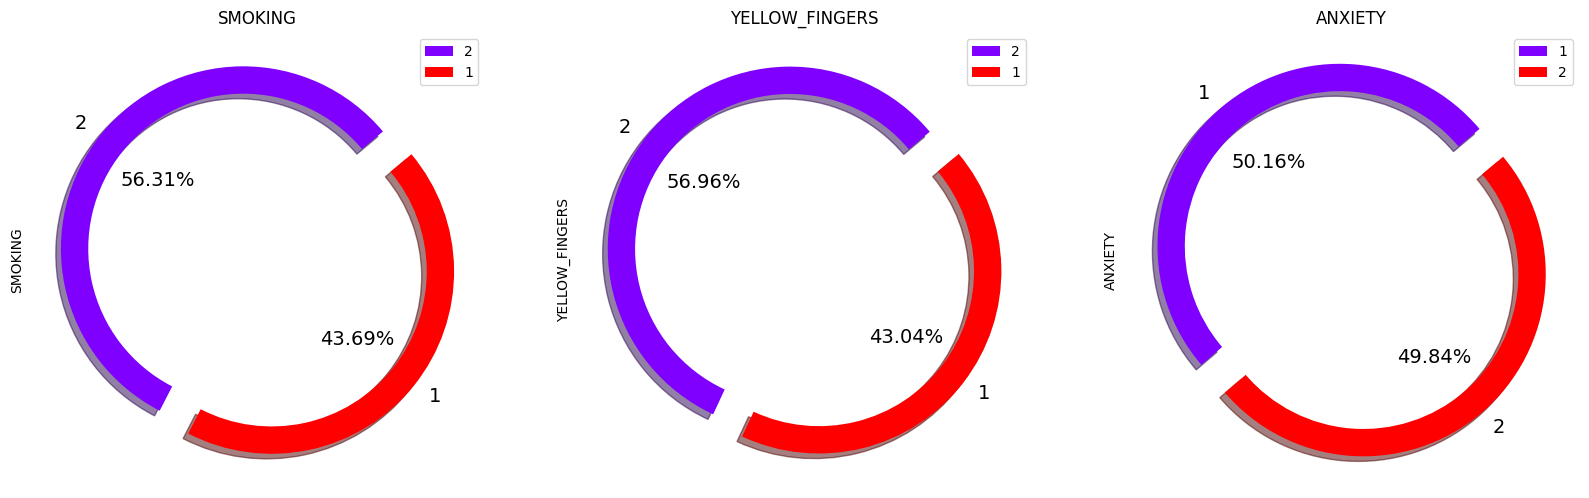

In [28]:
f,ax = plt.subplots(1,3,figsize=(20,10))
df.SMOKING.value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='rainbow', startangle=40,ax=ax[0], title='SMOKING')
df.YELLOW_FINGERS.value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='rainbow', startangle=40,ax=ax[1], title='YELLOW_FINGERS')
df.ANXIETY.value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='rainbow', startangle=40,ax=ax[2], title='ANXIETY')
plt.show()

**Observations:**

    1. 56% of population have a habit of SMOKING
    2. 57% of population have yellow fingers
    3. 50% of population suffering from Anxiety

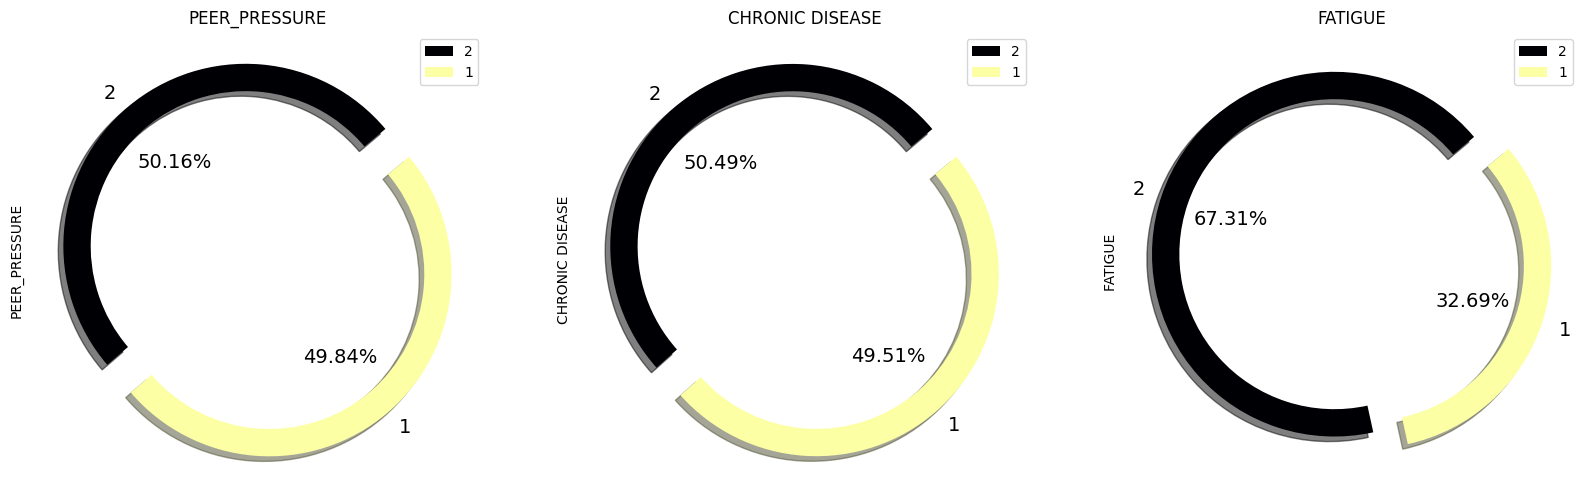

In [29]:
f,ax = plt.subplots(1,3,figsize=(20,10))
df.PEER_PRESSURE.value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='inferno', startangle=40,ax=ax[0], title='PEER_PRESSURE')
df['CHRONIC DISEASE'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='inferno', startangle=40,ax=ax[1], title='CHRONIC DISEASE')
df['FATIGUE '].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='inferno', startangle=40,ax=ax[2], title='FATIGUE')
plt.show()

**Observations:**

    1. 50% of population have a PEER Pressure
    2. 50% of population have chronic diseases
    3. 67% of population have fatigue

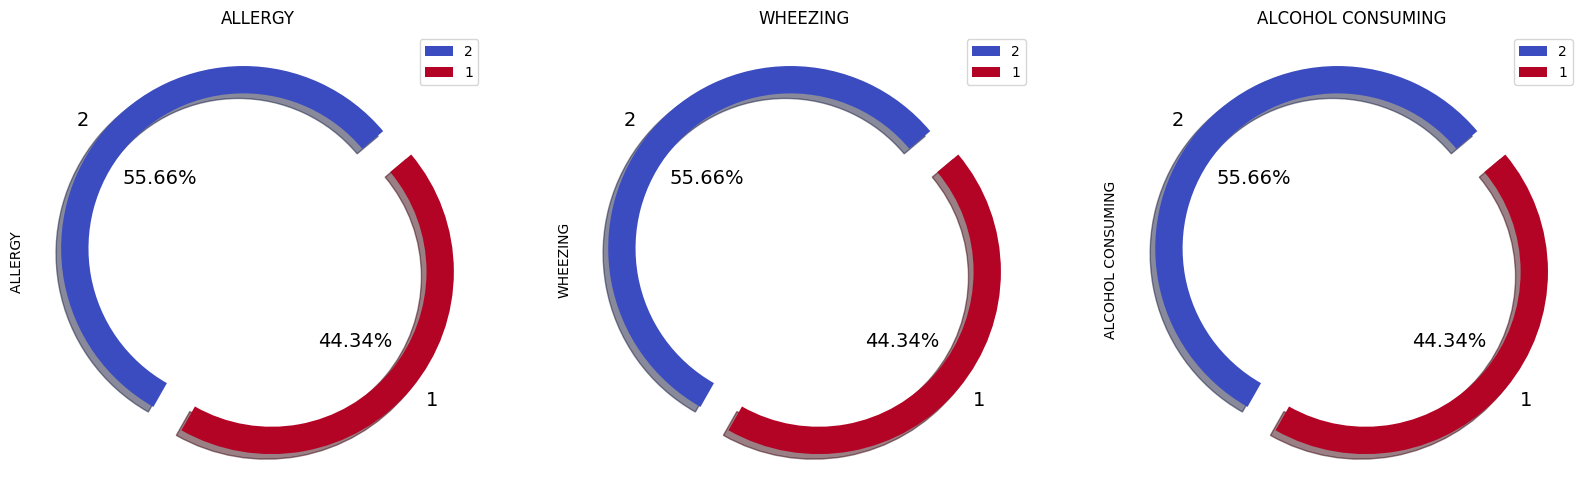

In [30]:
f,ax = plt.subplots(1,3,figsize=(20,10))
df['ALLERGY '].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='coolwarm', startangle=40,ax=ax[0], title='ALLERGY')
df['WHEEZING'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='coolwarm', startangle=40,ax=ax[1], title='WHEEZING')
df['ALCOHOL CONSUMING'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='coolwarm', startangle=40,ax=ax[2], title='ALCOHOL CONSUMING')
plt.show()

**Observations:**

    1. 55.66% of population have Allergy
    2. 55.66% of population have Wheezing
    3. 55.66% of population Consume Alcohol

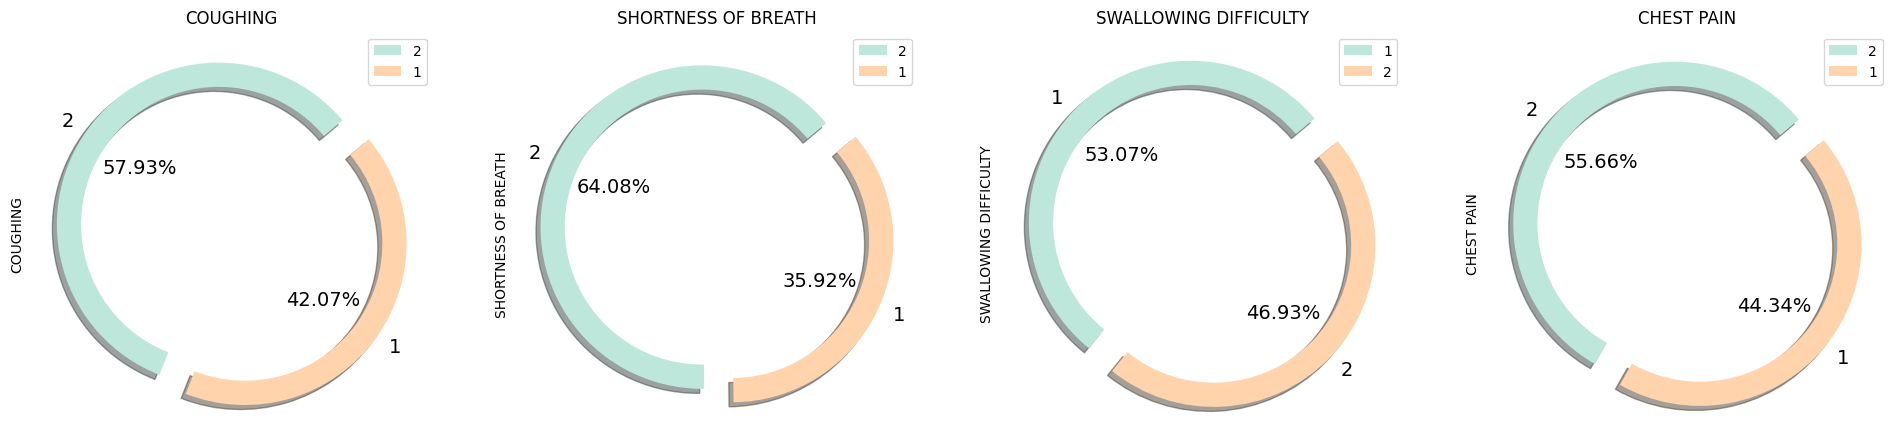

In [31]:
f,ax = plt.subplots(1,4,figsize=(24,10))
df['COUGHING'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='icefire', startangle=40,ax=ax[0], title='COUGHING')
df['SHORTNESS OF BREATH'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='icefire', startangle=40,ax=ax[1], title='SHORTNESS OF BREATH')
df['SWALLOWING DIFFICULTY'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='icefire', startangle=40,ax=ax[2], title='SWALLOWING DIFFICULTY')
df['CHEST PAIN'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=np.ones(2)/10,
                          fontsize=14, legend=True, wedgeprops={'width' : 0.15}, shadow=True,
                          cmap='icefire', startangle=40,ax=ax[3], title='CHEST PAIN')
plt.show()

**Observations:**

    1. 58% of population have Coughing problem
    2. 64% of population suffering from shortness of breath
    3. 53% of population suffering from Swalloing difficulty
    4. 55.66% of population suffered from Chest Pain

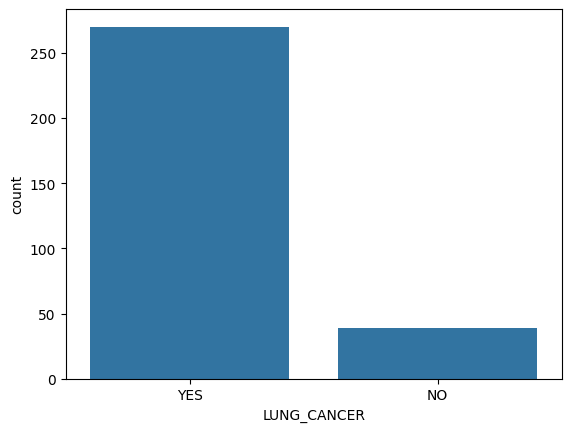

In [32]:
#- Targer Variable
sns.countplot(x='LUNG_CANCER', data=df)
plt.show()

### Bi-Variate Analysis

**How independent variables are behaving for Male and Female ??**

> Indented block



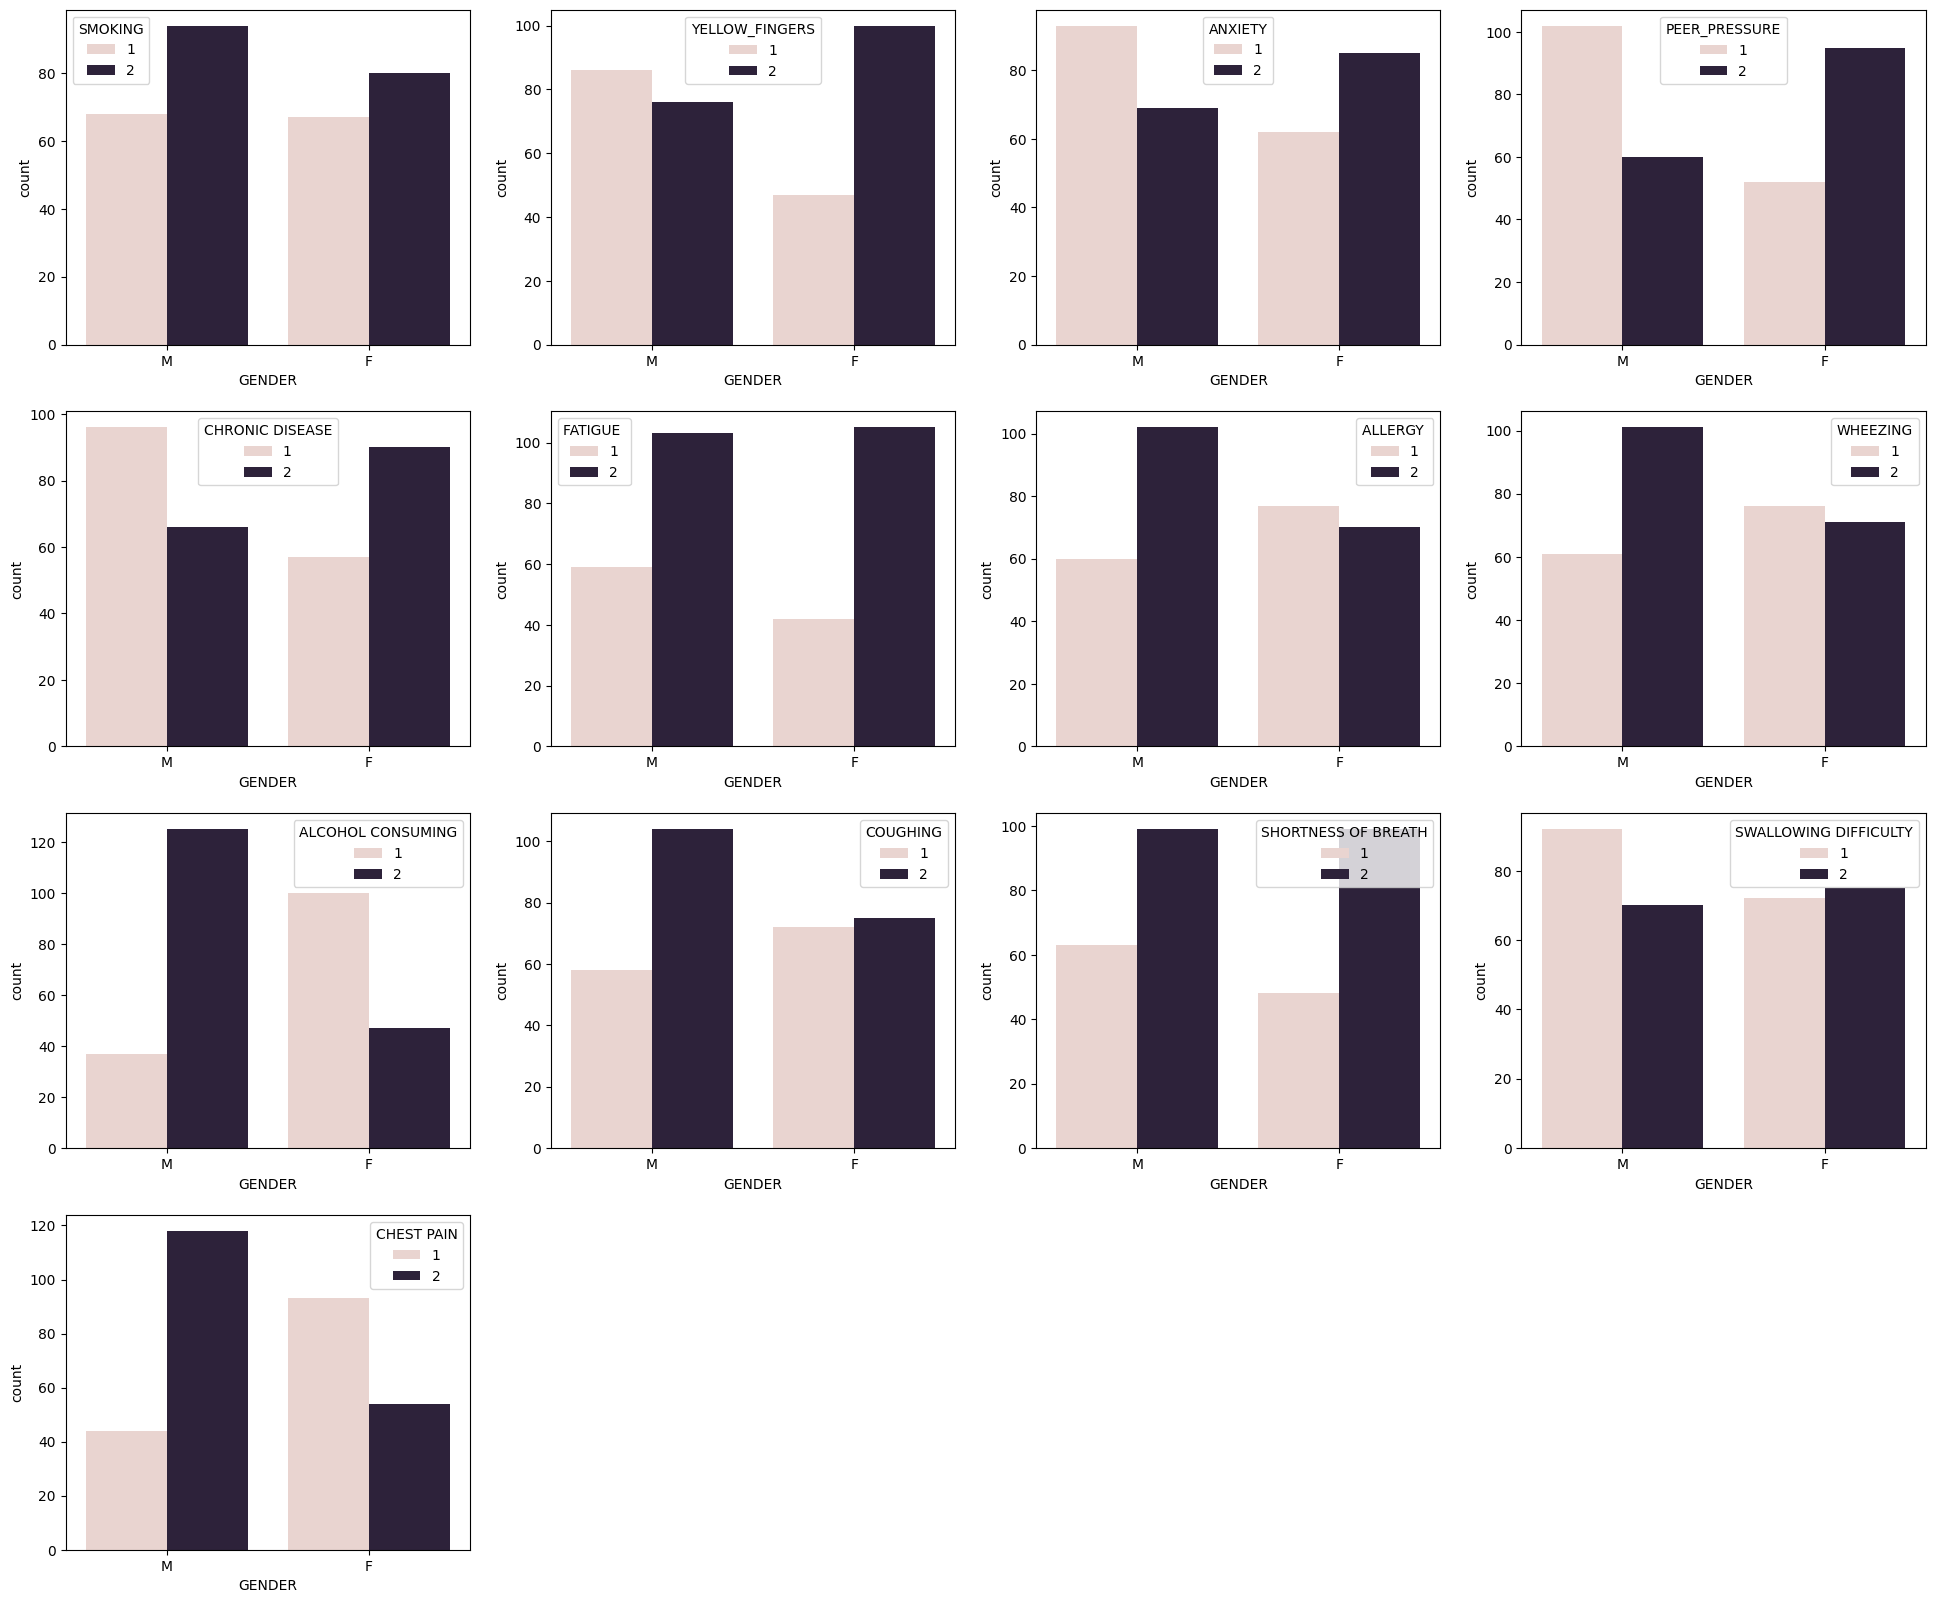

In [33]:
f,ax = plt.subplots(4,4,figsize=(24,20))
sns.countplot(x='GENDER',hue='SMOKING', data=df,ax=ax[0,0])
sns.countplot(x='GENDER', hue='YELLOW_FINGERS', data=df,ax=ax[0,1])
sns.countplot(x='GENDER', hue='ANXIETY', data=df,ax=ax[0,2])
sns.countplot(x='GENDER', hue='PEER_PRESSURE', data=df,ax=ax[0,3])
sns.countplot(x='GENDER',hue='CHRONIC DISEASE', data=df,ax=ax[1,0])
sns.countplot(x='GENDER', hue='FATIGUE ', data=df,ax=ax[1,1])
sns.countplot(x='GENDER', hue='ALLERGY ', data=df,ax=ax[1,2])
sns.countplot(x='GENDER', hue='WHEEZING', data=df,ax=ax[1,3])
sns.countplot(x='GENDER',hue='ALCOHOL CONSUMING', data=df,ax=ax[2,0])
sns.countplot(x='GENDER', hue='COUGHING', data=df,ax=ax[2,1])
sns.countplot(x='GENDER', hue='SHORTNESS OF BREATH', data=df,ax=ax[2,2])
sns.countplot(x='GENDER', hue='SWALLOWING DIFFICULTY', data=df,ax=ax[2,3])
sns.countplot(x='GENDER', hue='CHEST PAIN', data=df,ax=ax[3,0])
ax[3, 1].axis('off')
ax[3, 2].axis('off')
ax[3, 3].axis('off')
plt.show()

**How independent variables are effected to target Variable determining Lung Cancer yes/no ??**

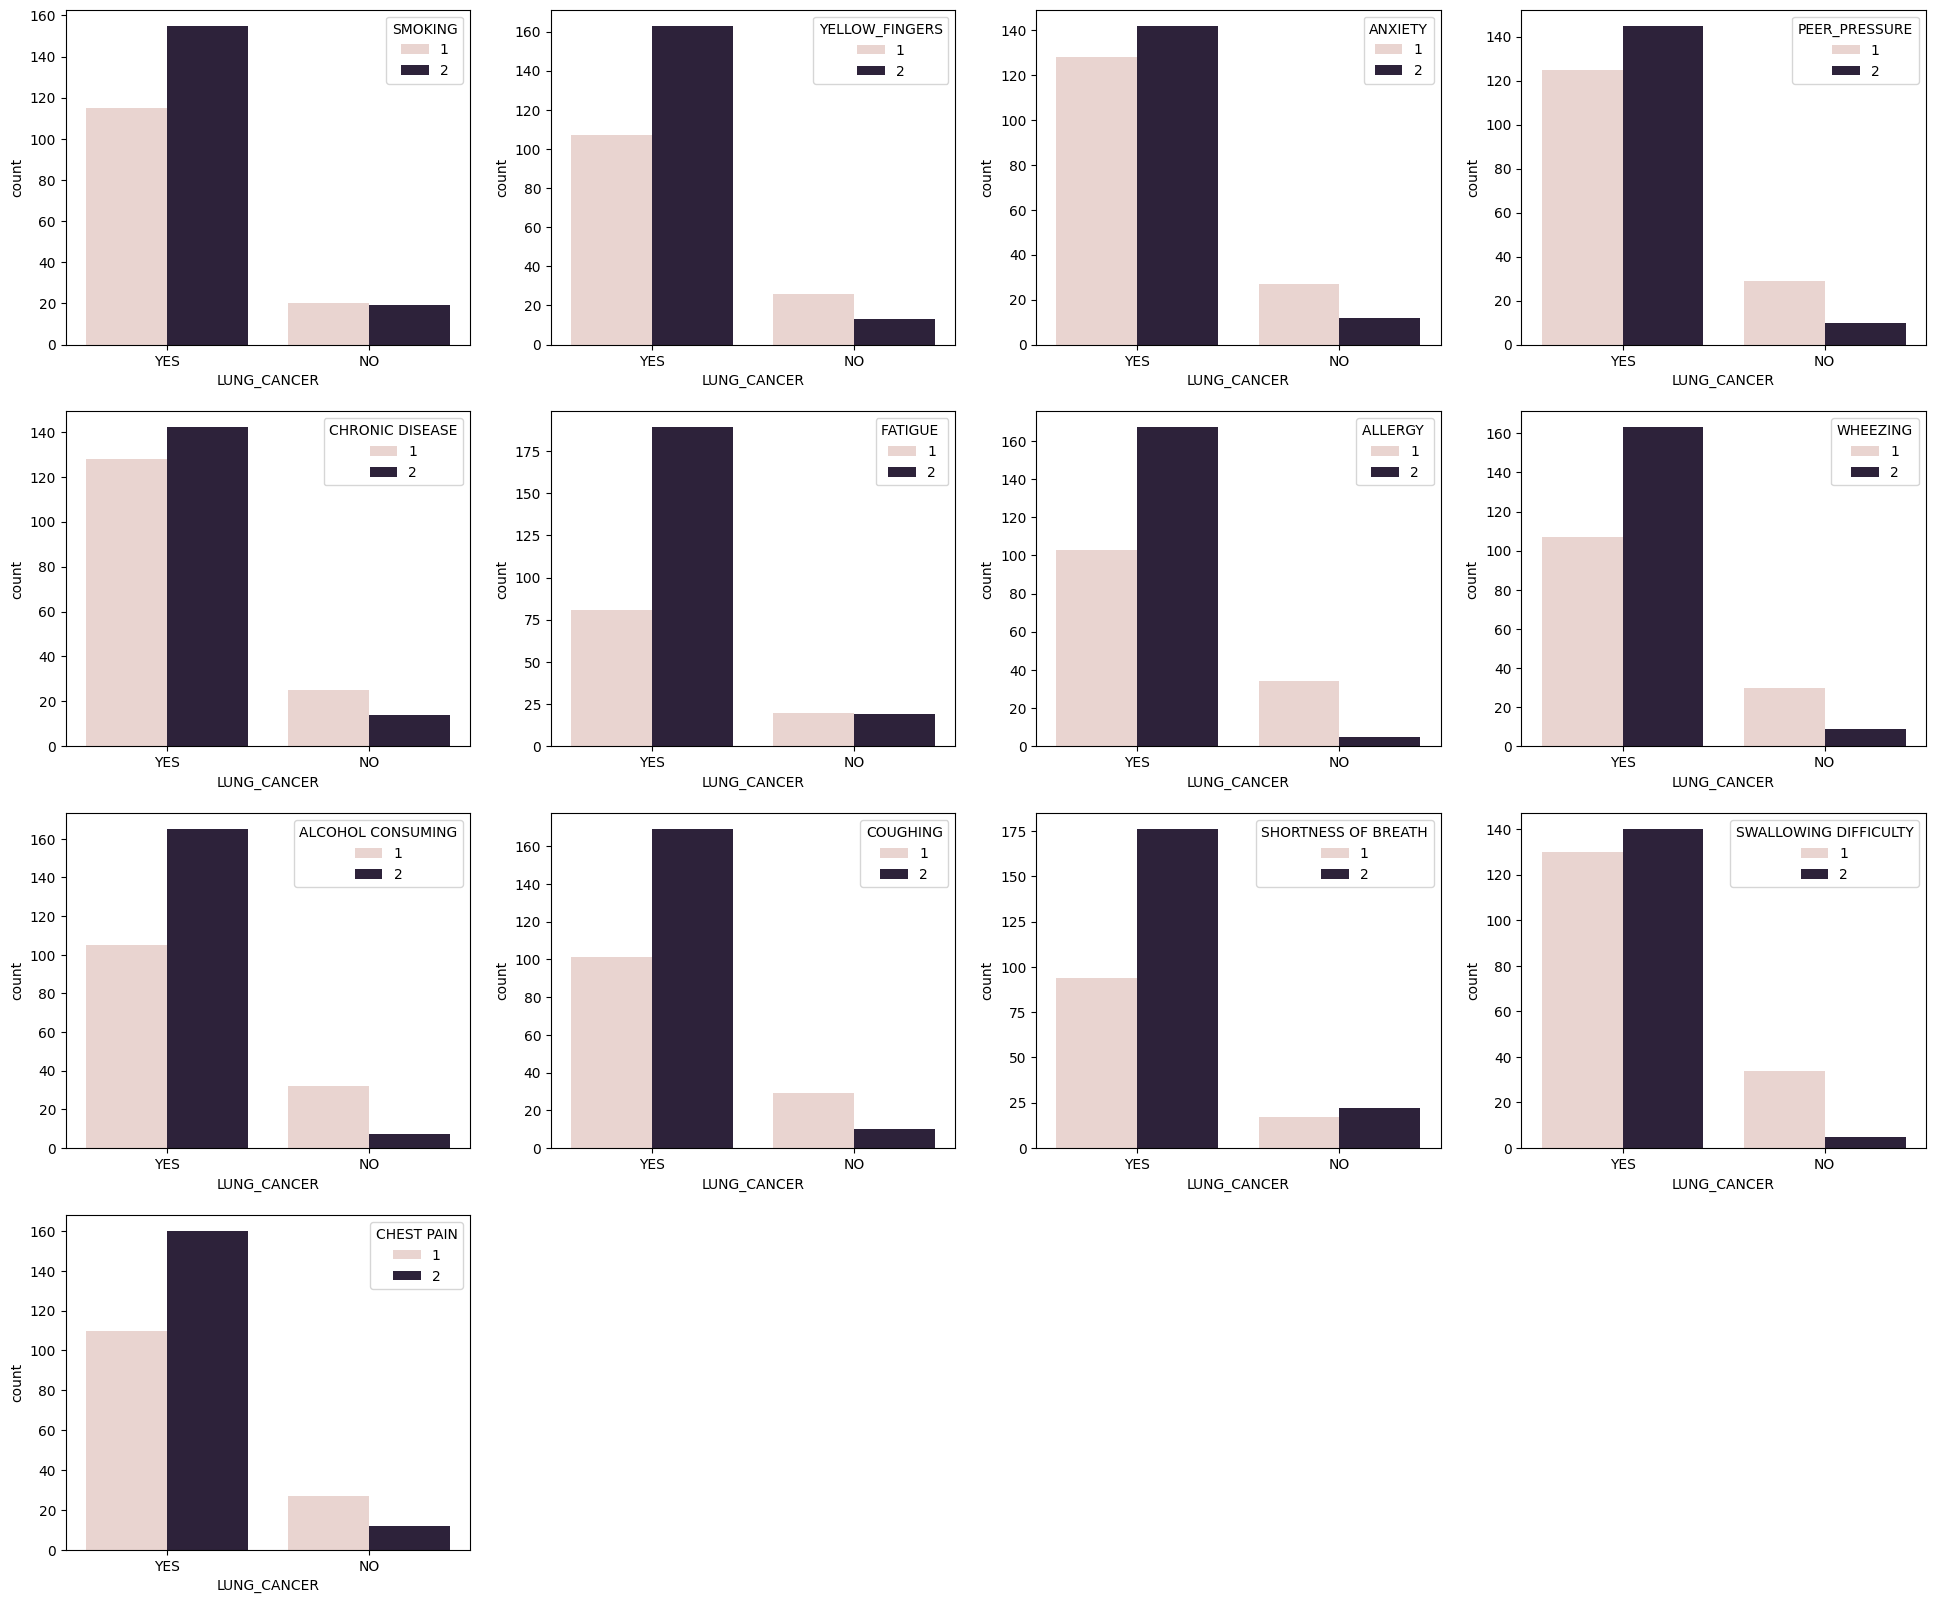

In [34]:
f,ax = plt.subplots(4,4,figsize=(24,20))
sns.countplot(x='LUNG_CANCER',hue='SMOKING', data=df,ax=ax[0,0])
sns.countplot(x='LUNG_CANCER', hue='YELLOW_FINGERS', data=df,ax=ax[0,1])
sns.countplot(x='LUNG_CANCER', hue='ANXIETY', data=df,ax=ax[0,2])
sns.countplot(x='LUNG_CANCER', hue='PEER_PRESSURE', data=df,ax=ax[0,3])
sns.countplot(x='LUNG_CANCER',hue='CHRONIC DISEASE', data=df,ax=ax[1,0])
sns.countplot(x='LUNG_CANCER', hue='FATIGUE ', data=df,ax=ax[1,1])
sns.countplot(x='LUNG_CANCER', hue='ALLERGY ', data=df,ax=ax[1,2])
sns.countplot(x='LUNG_CANCER', hue='WHEEZING', data=df,ax=ax[1,3])
sns.countplot(x='LUNG_CANCER',hue='ALCOHOL CONSUMING', data=df,ax=ax[2,0])
sns.countplot(x='LUNG_CANCER', hue='COUGHING', data=df,ax=ax[2,1])
sns.countplot(x='LUNG_CANCER', hue='SHORTNESS OF BREATH', data=df,ax=ax[2,2])
sns.countplot(x='LUNG_CANCER', hue='SWALLOWING DIFFICULTY', data=df,ax=ax[2,3])
sns.countplot(x='LUNG_CANCER', hue='CHEST PAIN', data=df,ax=ax[3,0])
ax[3, 1].axis('off')
ax[3, 2].axis('off')
ax[3, 3].axis('off')
plt.show()